1. Import Libraries
First, import the necessary libraries. Note that you can use GPU acceleration in Google Colab to speed up the training of much larger models, although it is not strictly necessary for this simple example

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2. Prepare the Training Data
The sources provide seven pairs of Celsius and Fahrenheit values to use as the input (X) and the desired output (Y)

In [2]:
# The input features (Celsius) and the Ground Truth labels (Fahrenheit)
celsius_q    = np.array([-40, -10, 0, 8, 15, 22, 38],  dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46.4, 59, 71.6, 100],  dtype=float)

3. Build the Model
The simplest model for this problem is a single-layer network with one neuron (a Perceptron). This neuron will learn the relationship between the input and output

In [6]:
# Define a single Dense layer with 1 neuron
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

# Assemble the layers into a Sequential model
model = tf.keras.Sequential([l0])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4. Compile the Model
Before training, you must define the Loss Function (to measure how far the prediction is from the truth) and the Optimizer (to adjust weights and reduce error). The sources recommend the Adam optimizer with a learning rate (η) of 0.1

In [7]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

5. Train the Model (Fit)
The training process involves the model making guesses and correcting itself through Backpropagation. The sources suggest running this for 500 epochs.

In [8]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


6. Visualize the Learning Progress
You can plot the loss magnitude to see how the model improved over time. As training progresses, the error (loss) should drop dramatically.

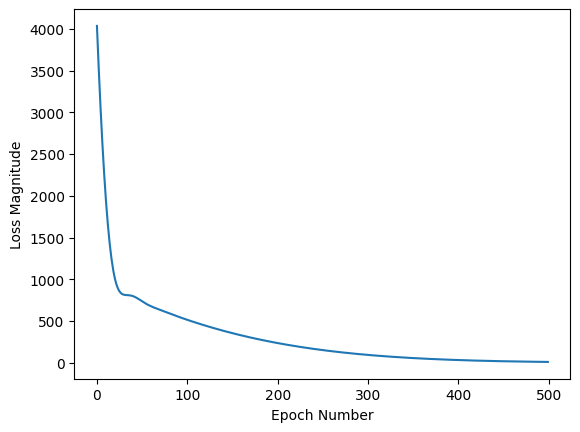

In [9]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

7. Predict and Inspect Weights
After training, you can test the model on a value it has never seen, such as 100°C (which should result in 212°F). You can also inspect the internal weights (m) and bias (b) to see if the model discovered the 1.8 and 32 values from the formula.

In [13]:
# Predict the value for 100 degrees Celsius
print(f"Prediction for 100.0: {model.predict(np.array([100.0]))}")

# View the internal variables learned by the neuron
weights = l0.get_weights()
print(f"Learned weights (m): {weights[0]}")
print(f"Learned bias/offset (b): {weights[1]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction for 100.0: [[211.16956]]
Learned weights (m): [[1.822622]]
Learned bias/offset (b): [28.907356]


8. Extra: Multi-Layer Model
If you want to experiment with a more complex architecture as shown in the presentation, you can create a model with multiple layers and neurons. While more powerful, this "hidden" internal logic is often harder to interpret than a single neuron.
For the final step of your Google Colab notebook, we will implement the Multi-Layer Model as described in the sources. This model uses three layers instead of one, which makes the internal logic more complex—even though it solves the same simple problem.
As noted in the sources, while a single neuron model clearly "discovers" the 1.8 and 32 values, a multi-layer model spreads this logic across many weights, making the internal variables look like "random" numbers that are harder to interpret.
Here is the complete code for Step 8:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the multi-layer model...
Finished training.


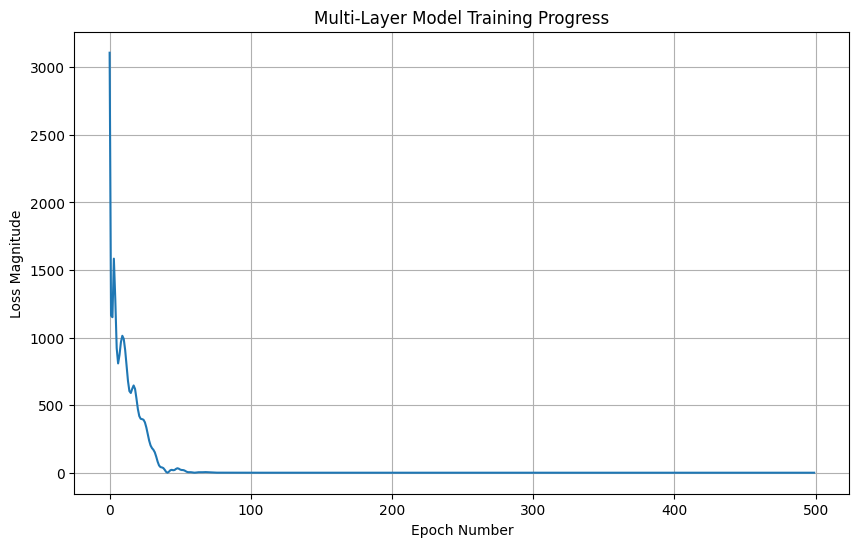

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

Prediction for 100.0°C: [[211.60559]]°F
(The correct answer is 212.0°F)

--- Internal 'Brain' of the Multi-Layer Model ---
Note: These values will look complex and 'distributed' across the network.

Layer 0 Weights (m):
[[ 0.52311873 -0.09121777 -0.2040263   0.78193396]]
Layer 0 Biases (b):
[3.8981013 2.492495  2.892635  3.7727647]

Layer 1 Weights (m):
[[ 0.8787067  -0.28635466 -0.00632683  0.5346376 ]
 [ 0.39756724  0.03784819  0.22413269  0.7948532 ]
 [ 0.6681599  -0.44776952 -0.5260784   0.30843508]
 [ 0.95421845 -0.5681606  -0.7176192  -0.23947683]]
Layer 1 Biases (b):
[ 3.8660395 -3.3434632 -3.0921574  3.760012 ]

Layer 2 Weights (m):
[[ 1.1543716 ]
 [-0.6508511 ]
 [-0.60947573]
 [ 0.3893165 ]]
Layer 2 Biases (b):
[3.7537024]


In [18]:
# --- Step 8: Multi-Layer Model Investigation ---

# 1. Define the layers for a more complex architecture
l0 = tf.keras.layers.Dense(units=4, input_shape=[1]) # Input layer with 4 neurons, expecting 1 feature
l1 = tf.keras.layers.Dense(units=4)                  # Hidden layer with 4 neurons
l2 = tf.keras.layers.Dense(units=1)                  # Output layer with 1 neuron

# 2. Assemble and compile the model
model_multi = tf.keras.Sequential([l0, l1, l2])
model_multi.compile(loss='mean_squared_error',
                    optimizer=tf.keras.optimizers.Adam(0.1))

# 3. Train the model
print("Training the multi-layer model...")
history_multi = model_multi.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training.")

# 4. Visualize the Learning Progress (Loss Graph)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.title("Multi-Layer Model Training Progress")
plt.plot(history_multi.history['loss'])
plt.grid(True)
plt.show()

# 5. Predict for 100 degrees Celsius
prediction = model_multi.predict(np.array([100.0]))
print(f"\nPrediction for 100.0°C: {prediction}°F")
print("(The correct answer is 212.0°F)")

# 6. Inspect Weights (m) and Biases (b) for each layer
print("\n--- Internal 'Brain' of the Multi-Layer Model ---")
print("Note: These values will look complex and 'distributed' across the network.")

for i, layer in enumerate([l0, l1, l2]):
    weights, biases = layer.get_weights()
    print(f"\nLayer {i} Weights (m):\n{weights}")
    print(f"Layer {i} Biases (b):\n{biases}")